In [6]:
import numpy as np
from gensim.test.utils import datapath, get_tmpfile
from gensim.corpora import WikiCorpus, MmCorpus
from gensim import corpora, models, similarities
from gensim.test.utils import datapath
from gensim.parsing.preprocessing import remove_stopwords
import dit
from dit.divergences import jensen_shannon_divergence
import matplotlib.pyplot as plt
import nltk
#nltk.download('stopwords')
import re
from gensim import corpora, models, similarities 

In [3]:
#import documents
documents = []
for i in range(1,10):
    f = open("bbc\\politics\\00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc\\politics\\0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,400):
    f = open("bbc\\politics\\"+str(i)+str(".txt"))
    documents.append(f.read())    
    
for i in range(1,10):
    f = open("bbc\\business\\00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc\\business\\0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,400):
    f = open("bbc\\business\\"+str(i)+str(".txt"))
    documents.append(f.read()) 
    
for i in range(1,10):
    f = open("bbc\\sport\\00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc\\sport\\0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,400):
    f = open("bbc\\sport\\"+str(i)+str(".txt"))
    documents.append(f.read())
    
for i in range(1,10):
    f = open("bbc\\tech\\00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc\\tech\\0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,400):
    f = open("bbc\\tech\\"+str(i)+str(".txt"))
    documents.append(f.read())   
    
for i in range(1,10):
    f = open("bbc\\entertainment\\00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc\\entertainment\\0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,386):
    f = open("bbc\\entertainment\\"+str(i)+str(".txt"))
    documents.append(f.read())    
        
    
    
names = np.array(["Theresa_May.txt","Tony_Blair.txt","Gordon_Brown.txt","Alec_Douglas.txt","David_Cameron.txt"
                  ,"Edward_Heath.txt","Harold_Wilson.txt","James_Callaghan.txt","John_Major.txt",
                  "Margaret_Thatcher.txt","Harold_Macmillan.txt","Anthony_Eden.txt","Winston_Churchill.txt"])

for name in names:
    #print(name)
    f = open("Text_Files//"+name,encoding="utf8")
    #documents.append(str(f.read()))

FileNotFoundError: [Errno 2] No such file or directory: 'bbc\\politics\\001.txt'

In [3]:
len(documents)

1981

In [4]:
def tokenize_only(text):
    '''
    This function is taken from Brandon Roze
    '''
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


stopwords = nltk.corpus.stopwords.words('english')


In [13]:
#tokenize

%time tokenized_list = [tokenize_only(text) for text in documents]
print("ok")
#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_list]
print("ok")

Wall time: 19.7 s
ok
Wall time: 2.67 s
ok


In [14]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=0.1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [72]:
%time lda = models.LdaModel(corpus, num_topics=20, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

Wall time: 13min 15s


In [73]:
#lda.save("bbc_model_whole")

In [2]:
lda = models.LdaModel.load("bbc_model_whole")


NameError: name 'models' is not defined

Having successfully trained our model we can use it to give us a topic distribution over the politicians we are interested in.

In [100]:
names = np.array(["Theresa_May.txt","Tony_Blair.txt","Gordon_Brown.txt","Alec_Douglas.txt","David_Cameron.txt"
                  ,"Edward_Heath.txt","Harold_Wilson.txt","James_Callaghan.txt","John_Major.txt",
                  "Margaret_Thatcher.txt","Harold_Macmillan.txt","Anthony_Eden.txt","Winston_Churchill.txt","LFC_text.txt"])[:-1]
proper_names = ["Theresa May","Tony Blair","Gordon Brown","Alec Douglas","David Cameron","Edward Heath","Harold Wilson",
           "James Callaghan","John Major","Margaret Thatcher","Harold Macmillan","Anthony Eden","Winston Churchill"]

summary = []

for name in names:
    #print(name)
    f = open("Text_Files//"+name,encoding="utf8")
    summary.append(f.read())

In [93]:
print(len(names),len(proper_names))

13 13


In [31]:
#get the topic distribution for each politician
def topicz(text,no_topics):
    topic_distribution =[]
    for i in text:
        new_doc = i
        new_vec = dictionary.doc2bow(new_doc.lower().split())
        topic_distribution.append(lda[new_vec])

    topics = [[[x for x in y] for y in z] for z in topic_distribution]
    only_numbers = [[float(word[1]) for word in topic] for topic in topics]
    only_topics = [[word[0] for word in topic] for topic in topics]

    topic_matrix = np.zeros((len(text),no_topics))
    for i in range(len(text)):
        topic_matrix[i,only_topics[i]] = only_numbers[i]
    return only_topics,only_numbers,topic_matrix



only_topics,only_numbers,topic_matrix = topicz(summary,20)

In [28]:
#let's also make this a document - topic matric which we can apply PCA directly on.


In [77]:
#lda.show_topics(formatted=False, num_words=20)

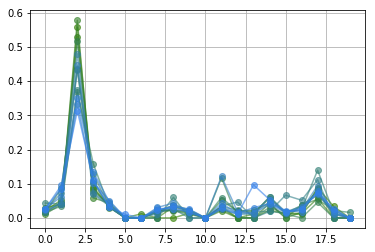

In [32]:
for i in range(len(names)):
    plt.plot(topic_matrix[i,:],"o-", alpha = 0.6, color = (0.2, 0.5, i/13))
    
#plt.plot(topic_matrix[13,:],"o-", alpha = 0.5, color = (1,0,0))

plt.grid()

In [34]:
#topic distributions are not normalised ==> need to do it manually
def normalise(list1):
    return (np.asarray(list1)/sum(list1))

normalise(only_numbers[0])
space = [i for i in range(0,20,1)]
print(space)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [35]:
X = dit.ScalarDistribution(outcomes = only_topics[0],pmf = only_numbers[0],validate = False,
                           base = "linear", sample_space = space)
print(X)

Class:    ScalarDistribution
Alphabet: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Base:     linear

x    p(x)
0    0.030011795461177826
1    0.04037519916892052
2    0.5575045347213745
3    0.08498290181159973
4    0.03385338932275772
9    0.013984800316393375
11   0.03306001424789429
14   0.022645864635705948
15   0.01169831957668066
16   0.010620971210300922
17   0.08821190148591995
18   0.033576011657714844


In [36]:

#need to do the above in a way tha create a distance matrix
#will use an array
def sj_distance(only_topics,only_numbers):
    l = len(only_numbers)
    distance_matrix = np.zeros((l,l))
    for i in range(l):
        for j in range(l):
            #print(i,j)
            X = dit.ScalarDistribution(outcomes = only_topics[i],pmf = normalise(only_numbers[i]),validate = False,
                               base = "linear", sample_space = space)
            Y = dit.ScalarDistribution(outcomes = only_topics[j],pmf = normalise(only_numbers[j]),validate = False,
                               base = "linear", sample_space = space)
            distance_matrix[i,j] = np.sqrt(jensen_shannon_divergence([X,Y]))
    return distance_matrix

In [1]:
from sklearn.cluster import KMeans

num_clusters = 3     #Set the number of clusters

km = KMeans(n_clusters=num_clusters)

%time km.fit(distance_matrix)   

clusters = km.labels_.tolist()

print (clusters)
print ()

plt.plot(clusters,proper_names, 'o', color = 'blue', markersize = 10)
plt.grid()
plt.xlabel("Cluster")
plt.ylabel("Politician")
#plt.savefig("KMeansClustering.pdf")
colours = ["red","green","blue","purple"]
colours = [(0.2,0.5,0.2),(0.2,0.5,0.5),(0.2,0.5,0.9)]

NameError: name 'distance_matrix' is not defined

AttributeError: 'KMeans' object has no attribute 'labels_'

[0.99885213 0.35693324]


C:\Users\George\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


[5 5 5 2 5 3 6 7 1 1 3 2 4]


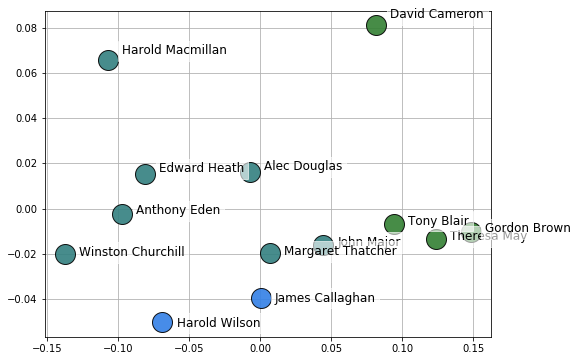

<Figure size 432x288 with 0 Axes>

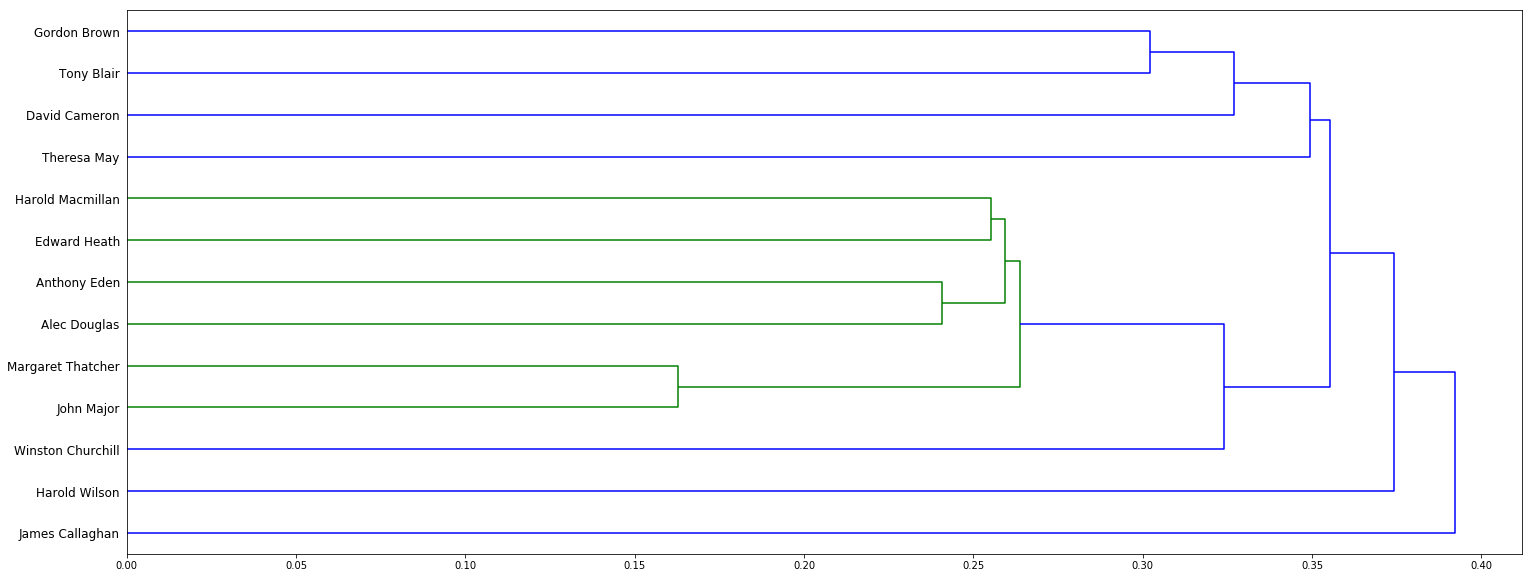

In [127]:
distance_matrix = sj_distance(only_topics,only_numbers)


#try to perform a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#coordinates = pca.fit_transform(distance_matrix)
coordinates = pca.fit_transform(topic_matrix)
#print(coordinates)
print(np.sum(np.abs(coordinates),axis = 0))

'''
fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(coordinates[:,0], coordinates[:,1], color = "red", marker = "o", s = 100,alpha = 0.8, edgecolors = "black")
for i, txt in enumerate(names):
    ax.annotate("  "+txt[:-4], (coordinates[i,0], coordinates[i,1]))
    
#plt.legend()
plt.grid()
plt.axvline(linestyle = "--", color = "black")
plt.axhline(linestyle = "--", color = "black")
scale = 1E-5
#plt.axis([-1*scale,1.5*scale,-1*scale,1*scale])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
'''
plt.figure(figsize = (8,6))
for i, txt in enumerate(names):
    plt.plot(coordinates[i,0], coordinates[i,1],"o",color = colours[clusters[i]],
             markersize = 20,alpha = 0.9,markeredgecolor = "black", label = proper_names[i])
    plt.text(coordinates[i,0]+0.01, coordinates[i,1]*(1.04),s = proper_names[i],size=12
             ,bbox=dict(boxstyle="square",
                   ec=(1., 1.0, 1.0),
                   fc=(1., 1, 1),alpha = 0.6
                                                                                   
                   ))
#plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.grid()
plt.savefig("Figures\\LDA_on_bbc_politicians.pdf")

#plt.savefig("PCA_Clusters_LDA.pdf")

from scipy.cluster.hierarchy import ward, dendrogram, linkage,fcluster
plt.figure()
#linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
linkage_matrix = linkage(distance_matrix)
print(fcluster(linkage_matrix,t= 0.768))
#print(linkage_matrix)
titles = proper_names
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix, labels = titles, orientation = "right")
#plt.savefig('ward_clusters.pdf') #save figure as ward_clusters

### Using the LDA Model for Clustering of unlabelled text data.

We will use randomly selected documents from out corspus and is if the model clusters the data as we would expect it to.
The way we have constructed our corpus we can expted that the articles will have the following indexes:

politics 1:400

business 400:800

sport 800:1200

entertainment 1200:1600

tech 1600:2000

In [85]:
sample_numbers = [2,3,4,8,10,15,402,403,405,404,406,407,802,803,804,805,810,812,1202,1203,1206,1207,1210]
sample = [documents[i] for i in sample_numbers]
only_topics1,only_numbers1,topic_matrix1 = topicz(sample,20)

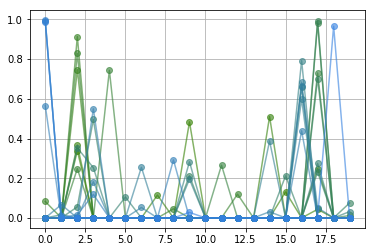

In [87]:
for i in range(6):
    plt.plot(topic_matrix1[i,:],"o-", alpha = 0.6, color = (0.2, 0.5, i/25))
    
for i in range(6,12):
    plt.plot(topic_matrix1[i,:],"o-", alpha = 0.6, color = (0.2, 0.5, i/25))    
    
for i in range(12,18):
    plt.plot(topic_matrix1[i,:],"o-", alpha = 0.6, color = (0.2, 0.5, i/25))    
        
#plt.plot(topic_matrix1[13,:],"o-", alpha = 0.5, color = (1,0,0))

plt.grid()

[11.02832003 13.25066527]


C:\Users\George\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


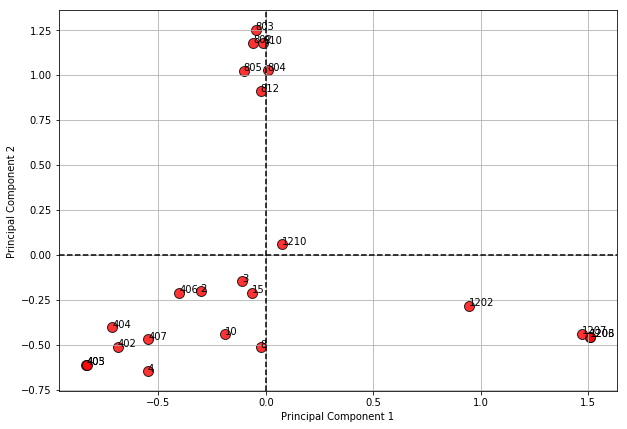

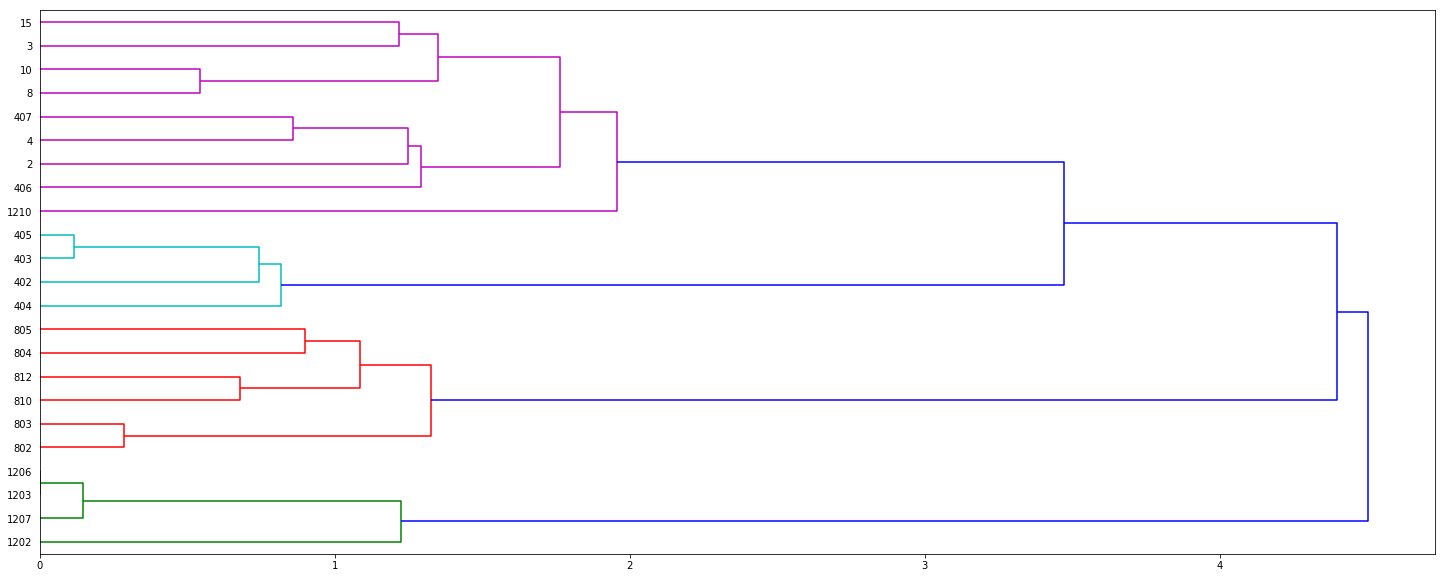

In [88]:
distance_matrix1 = sj_distance(only_topics1,only_numbers1)


#try to perform a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

coordinates = pca.fit_transform(distance_matrix1)
#coordinates = pca.fit_transform(topic_matrix1)
#print(coordinates)
print(np.sum(np.abs(coordinates),axis = 0))

fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(coordinates[:,0], coordinates[:,1], color = "red", marker = "o", s = 100,alpha = 0.8, edgecolors = "black")
for i, txt in enumerate(sample_numbers):
    ax.annotate(txt, (coordinates[i,0], coordinates[i,1]))
    
#plt.legend()
plt.grid()
plt.axvline(linestyle = "--", color = "black")
plt.axhline(linestyle = "--", color = "black")
scale = 1E-5
#plt.axis([-1*scale,1.5*scale,-1*scale,1*scale])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

#plt.savefig("PCA_Clusters_LDA.pdf")

from scipy.cluster.hierarchy import ward, dendrogram, linkage

linkage_matrix = ward(distance_matrix1) #define the linkage_matrix using ward clustering pre-computed distances
#linkage_matrix = linkage(distance_matrix1)
#print(linkage_matrix)
titles = list(sample_numbers)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix, labels = titles, orientation = "right")
#plt.savefig('ward_clusters.pdf') #save figure as ward_clusters